# # Airlines Call Data Analysis

This notebook focuses on analyzing airline call data, customer information, call reasons, sentiment statistics, and identifying trends from call transcripts. We will visualize various aspects such as the frequency of call reasons, customer elite levels, sentiment metrics, and explore common keywords using text analysis.

## Step 1: Import Required Libraries
We start by importing essential libraries for data manipulation, visualization, and text processing.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Set seaborn style for the plots
sns.set(style="whitegrid")


## Step 2: Load the Datasets
We load the datasets: `callsData`, `customerData`, `reasonData`, `sentimentData`, and `testData1`. Let's inspect the first few rows of each dataset.


In [3]:
# Load the datasets
callsData = pd.read_csv('../AirLinesData/callsf0d4f5a.csv')
customerData = pd.read_csv('../AirLinesData/customers2afd6ea.csv')
reasonData = pd.read_csv('../AirLinesData/reason18315ff.csv')
sentimentData = pd.read_csv('../AirLinesData/sentiment_statisticscc1e57a.csv')
testData1 = pd.read_csv('../AirLinesData/testbc7185d.csv')

# Display the first 5 rows of each dataset
print("Calls Data:")
display(callsData.head(5))

print("Customer Data:")
display(customerData.head(5))

print("Reason Data:")
display(reasonData.head(5))

print("Sentiment Data:")
display(sentimentData.head(5))

print("Test Data:")
display(testData1.head(5))


Calls Data:


,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...


Customer Data:


,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0


Reason Data:


,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating


Sentiment Data:


,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35


Test Data:


,call_id
0,7732610078
1,2400299738
2,6533095063
3,7774450920
4,9214147168


## Step 3: Analyze a Sample Call Transcript
Let's extract and display the transcript of the first call in `callsData`.


In [4]:
# Display the first call transcript
callsData.loc[0, 'call_transcript']


"\n\nAgent: Thank you for calling United Airlines customer service, my name is Sarah how may I help you?\n\nCustomer: Hi, yeah I'm calling because my flight from Chicago to New York was delayed by over 3 hours! This is ridiculous, I'm missing important meetings because of this. \n\nAgent: I'm so sorry to hear about the delay, that's definitely frustrating. Umm, let me pull up your reservation and take a look at what happened. *typing sounds* Okay, it looks like there was severe weather in Chicago that caused multiple flight cancellations and delays across the board for all the airlines. Ahh shoot, yeah your original flight was scheduled to depart at 2pm but didn't actually take off until after 5pm.\n\nCustomer: Ugh this is such poor planning on United's part, you should have rerouted passengers or put us on other flights that weren't delayed. Now I've wasted a whole day. \n\nAgent: I understand your frustration sir, delays are never fun. Let me see what options I have available to help

## Step 4: Analyze Unique Categories and Their Counts in Primary Call Reasons

We will explore the unique primary call reasons and count how frequently they occur. The top 10 most common reasons will be visualized.


Unique Primary Call Reasons:
['Voluntary  Cancel' 'Booking' 'IRROPS' 'Upgrade' 'Seating'
 'Mileage   Plus' 'Checkout' 'Voluntary   Change' 'Post Flight' 'Check In'
 'Other  Topics' 'Communications' 'Schedule Change' 'Products & Services'
 'IRROPS  ' 'Digital   Support' 'Seating  ' 'Disability'
 'Unaccompanied Minor' ' Baggage' 'Traveler  Updates' 'Communications  '
 'ETC' 'Upgrade  ' 'Unaccompanied Minor  ' 'Voluntary Change'
 'Voluntary Change  ' 'Checkout  ' 'Mileage Plus' 'Mileage Plus  '
 'Booking  ' 'Baggage  ' 'Post-Flight' 'Post-Flight  ' 'Schedule Change  '
 'Baggage' 'Traveler Updates' 'Voluntary Cancel' 'Check-In'
 'Products and Services' 'Check-In  ' 'Other Topics' 'Other Topics  '
 'ETC  ' 'Disability  ' 'Digital Support' 'Digital Support  '
 'Voluntary Cancel  ' 'Products and Services  ' 'Traveler Updates  '
 'Traveler   Updates' 'Digital  Support' 'Mileage  Plus'
 'Voluntary  Change']


/var/folders/9z/fc461bgx3cn47y_wzv1n8m7m0000gn/T/ipykernel_4314/618530112.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=uniqueCategoriesCount, x="primary_call_reason", y="Count", palette="viridis")


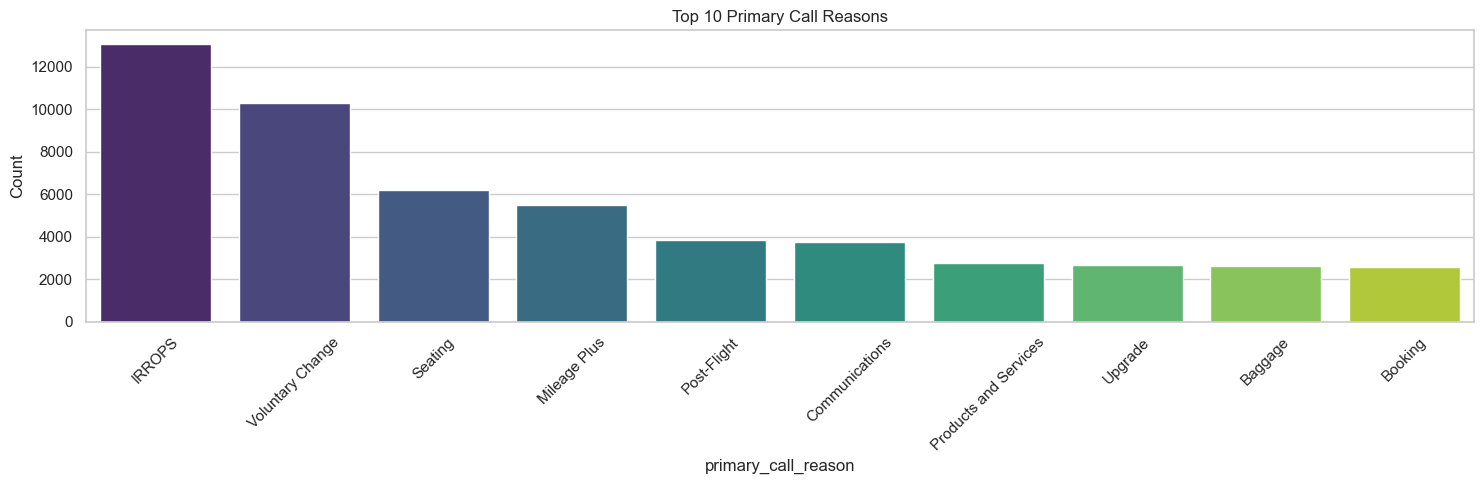

In [5]:
# Get unique categories of call reasons
uniqueCategories = reasonData['primary_call_reason'].unique()
print("Unique Primary Call Reasons:")
print(uniqueCategories)

# Count the frequency of each primary call reason
uniqueCategoriesCount = reasonData['primary_call_reason'].value_counts().head(10).reset_index()
uniqueCategoriesCount.columns = ['primary_call_reason', 'Count']

# Plotting the top 10 call reasons
plt.figure(figsize=(15, 5))
sns.barplot(data=uniqueCategoriesCount, x="primary_call_reason", y="Count", palette="viridis")
plt.title('Top 10 Primary Call Reasons')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Step 5: Analyze Customer Elite Levels

We analyze and plot the distribution of customers based on their elite level in the airline's loyalty program.


/var/folders/9z/fc461bgx3cn47y_wzv1n8m7m0000gn/T/ipykernel_4314/3259210792.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ratingCount, x="elite_level", y="count", palette="coolwarm")


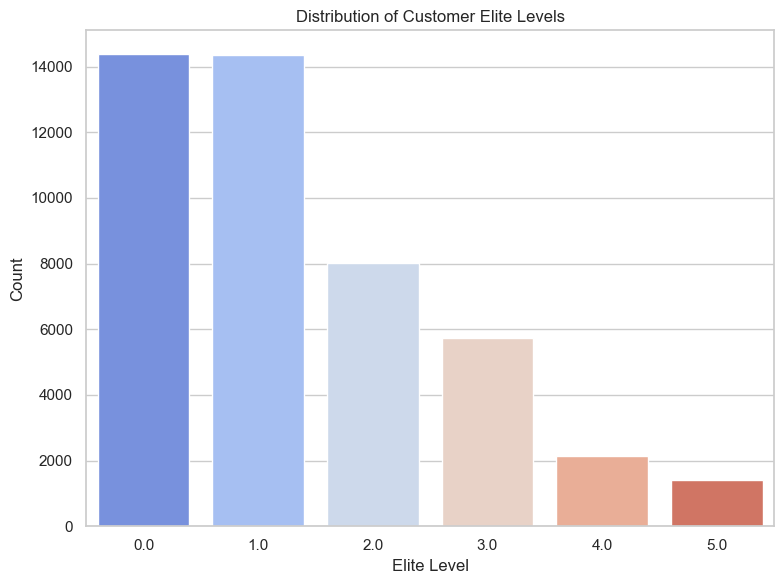

In [7]:
# Count the occurrences of each elite level
ratingCount = customerData['elite_level_code'].value_counts().reset_index()
ratingCount.columns = ['elite_level', 'count']  # Rename the columns for clarity

# Plot the elite level distribution
plt.figure(figsize=(8, 6))
sns.barplot(data=ratingCount, x="elite_level", y="count", palette="coolwarm")
plt.title('Distribution of Customer Elite Levels')
plt.xlabel('Elite Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


## Step 6: Sentiment Analysis: Silence Percentage

We will explore the distribution of silence percentage in calls, which might indicate customer dissatisfaction or confusion.


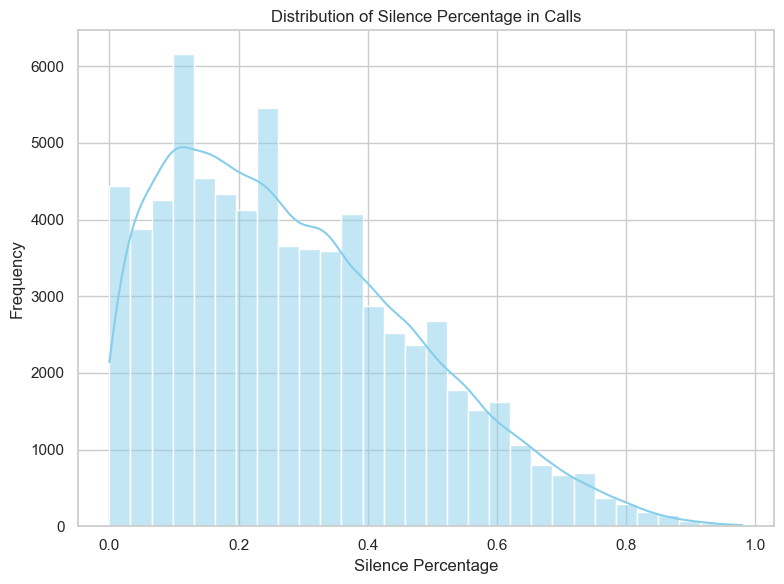

In [8]:
# Plot the distribution of silence percentage
plt.figure(figsize=(8, 6))
sns.histplot(data=sentimentData, x='silence_percent_average', kde=True, bins=30, color='skyblue')
plt.title('Distribution of Silence Percentage in Calls')
plt.xlabel('Silence Percentage')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## Step 8: Keyword Extraction from Call Transcripts

We perform text analysis to extract the most common keywords from call transcripts using the `CountVectorizer`.


In [9]:
# Clean the transcripts by removing NaN values
callsData['call_transcript'].fillna('', inplace=True)

# Use CountVectorizer to extract top 500 keywords
vectorizer = CountVectorizer(stop_words='english', max_features=500)
X_transcripts = vectorizer.fit_transform(callsData['call_transcript'])

# Create a DataFrame with word frequencies
transcript_keywords = pd.DataFrame(X_transcripts.toarray(), columns=vectorizer.get_feature_names_out())

# Sum the frequencies of each keyword
common_keywords = transcript_keywords.sum().sort_values(ascending=False)

# Display the top 20 keywords
print("Top keywords from call transcripts:")
print(common_keywords.head(20))


/var/folders/9z/fc461bgx3cn47y_wzv1n8m7m0000gn/T/ipykernel_4314/2916566735.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  callsData['call_transcript'].fillna('', inplace=True)


Top keywords from call transcripts:
flight      631962
agent       555458
customer    549932
let         310728
change      248693
help        201067
like        194177
thank       184727
united      173306
calling     159962
okay        156940
typing      155719
just        135322
work        134236
day         133868
time        127528
need        126268
yeah        123142
really      119979
thanks      119782
dtype: int64


## Step 9: Top Primary Call Reasons

We visualize the top 10 most common primary call reasons again using a different approach for better visualization.


/var/folders/9z/fc461bgx3cn47y_wzv1n8m7m0000gn/T/ipykernel_4314/3707946780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=reasonData, x='primary_call_reason', order=reasonData['primary_call_reason'].value_counts().index, palette="deep")


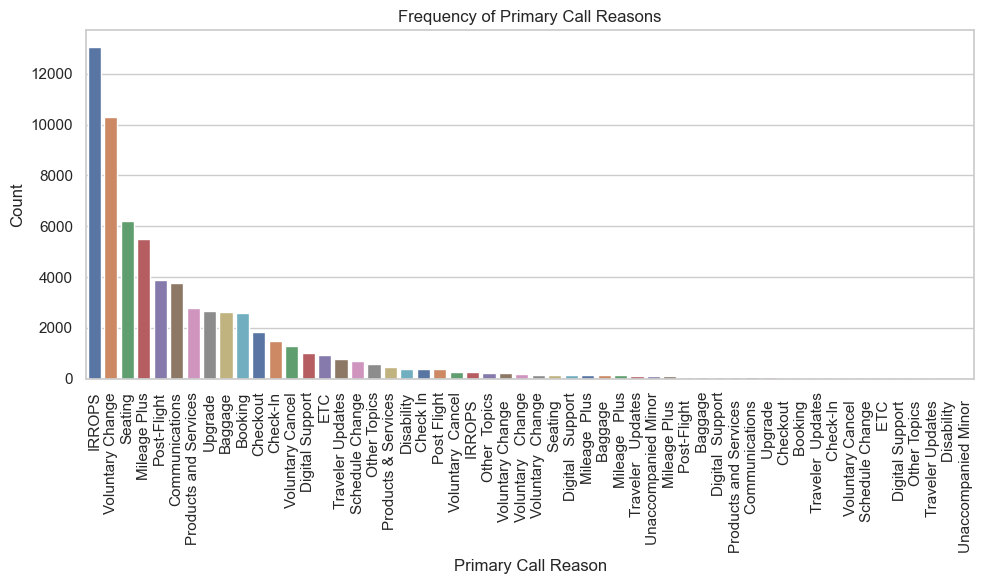

In [10]:
# Plot the top primary call reasons using sns.countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=reasonData, x='primary_call_reason', order=reasonData['primary_call_reason'].value_counts().index, palette="deep")
plt.title('Frequency of Primary Call Reasons')
plt.xticks(rotation=90)
plt.xlabel('Primary Call Reason')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


## Step 10: Generate a Word Cloud from Call Transcripts

We will generate a word cloud from all the call transcripts to visualize the most frequent words.


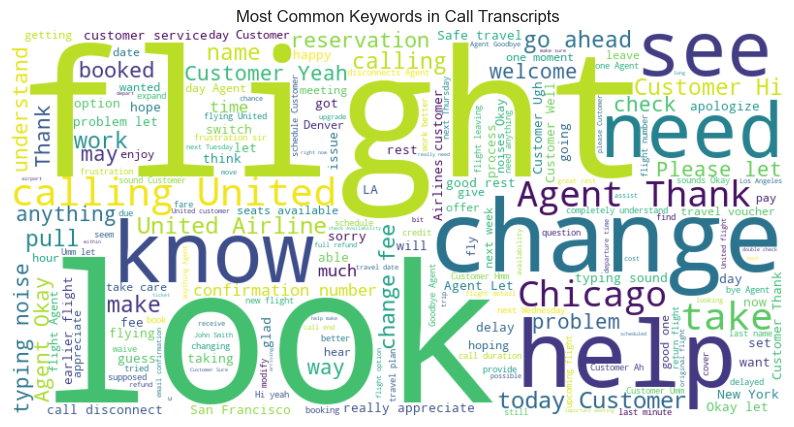

In [11]:
# Combine all transcripts into a single string
text = ' '.join(callsData['call_transcript'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Keywords in Call Transcripts')
plt.show()
